In [0]:
import pandas as pd
import numpy as np

In [0]:
casos = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [0]:
casos.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
472,Sint Maarten,Netherlands,18.0425,-63.0548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
473,NaN,Niger,17.6078,8.0817,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
474,NaN,Papua New Guinea,-6.3150,143.9555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
475,Isle of Man,United Kingdom,54.2361,-4.5481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
476,NaN,Zimbabwe,-20.0000,30.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## **CORONA VIRUS NO MUNDO**

In [0]:
colunas = casos.shape[1]

In [0]:
casos_data = casos.iloc[ : , 4:colunas]

In [0]:
casos_data = np.sum(casos_data)
casos_data.index = pd.DatetimeIndex(casos_data.index)

Text(0.5, 0.98, 'CASOS COVID-19')

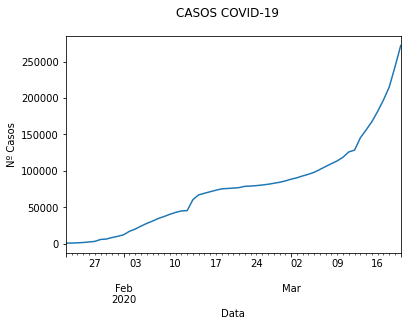

In [0]:
casos_data.plot()
plt.ylabel('Nº Casos')
plt.xlabel('Data')
plt.suptitle('CASOS COVID-19')

## **MORTES POR COVID-19**

In [0]:
mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

In [0]:
mortes.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
472,Sint Maarten,Netherlands,18.0425,-63.0548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
473,NaN,Niger,17.6078,8.0817,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
474,NaN,Papua New Guinea,-6.3150,143.9555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
475,Isle of Man,United Kingdom,54.2361,-4.5481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
476,NaN,Zimbabwe,-20.0000,30.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
colunas_m = mortes.shape[1]
mortes_data = mortes.iloc[ : , 4:colunas]
mortes_data = np.sum(mortes_data)
mortes_data.index = pd.DatetimeIndex(mortes_data.index)

Text(0.5, 0.98, 'MORTES COVID-19')

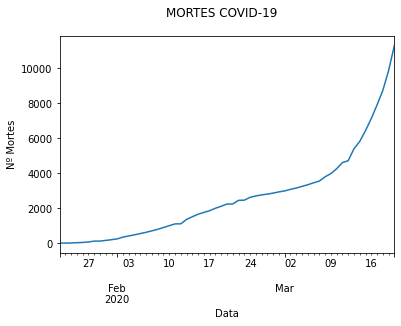

In [0]:
mortes_data.plot()
plt.ylabel('Nº Mortes')
plt.xlabel('Data')
plt.suptitle('MORTES COVID-19')

## **MORTALIDADE**

Text(0.5, 0.98, 'MORTALIDADE COVID-19')

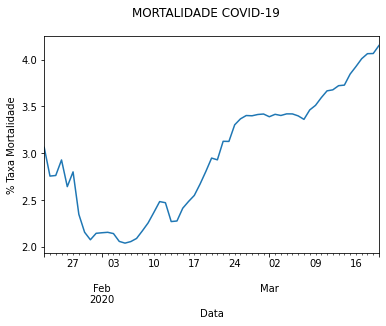

In [0]:
mortalidade = (mortes_data/casos_data)*100
mortalidade.plot()
plt.ylabel('% Taxa Mortalidade')
plt.xlabel('Data')
plt.suptitle('MORTALIDADE COVID-19')

## **CASOS RECUPERADOS**


In [0]:
recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [0]:
colunas_r = recuperados.shape[1]
recuperados_data = recuperados.iloc[ : , 4:colunas]
recuperados_data = np.sum(recuperados_data)
recuperados_data.index = pd.DatetimeIndex(recuperados_data.index)

Text(0.5, 0.98, 'RECUPERADOS COVID-19')

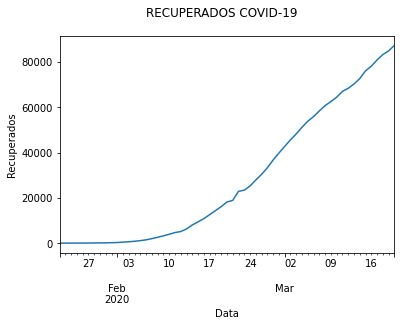

In [0]:
recuperados_data.plot()
plt.ylabel('Recuperados')
plt.xlabel('Data')
plt.suptitle('RECUPERADOS COVID-19')

In [0]:
taxa_recuperados = (recuperados_data/casos_data)*100

Text(0.5, 0.98, '% RECUPERADOS COVID-19')

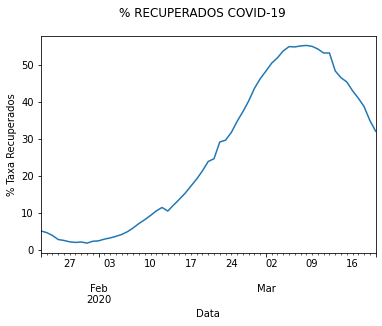

In [0]:
taxa_recuperados.plot()
plt.ylabel('% Taxa Recuperados')
plt.xlabel('Data')
plt.suptitle('% RECUPERADOS COVID-19')

## **CASOS ATIVOS**

In [0]:
ativos = (casos_data-(recuperados_data+mortes_data))

Text(0.5, 0.98, 'PESSOAS COM VIRUS ATIVO COVID-19')

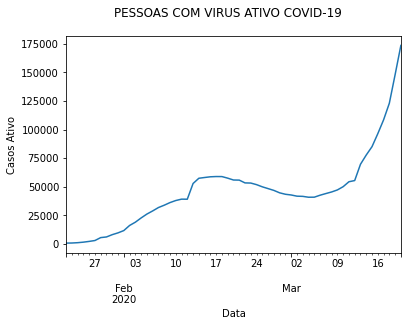

In [0]:
ativos.plot()
plt.ylabel('Casos Ativo')
plt.xlabel('Data')
plt.suptitle('PESSOAS COM VIRUS ATIVO COVID-19')

In [0]:
p_ativos = ((casos_data-(recuperados_data+mortes_data))/casos_data)*100

Text(0.5, 0.98, '%PESSOAS COM VIRUS ATIVO COVID-19')

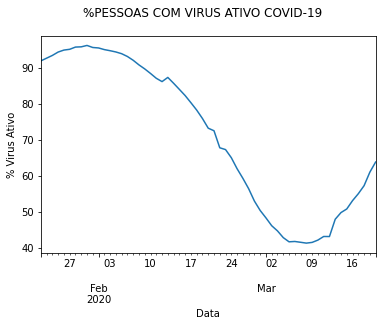

In [0]:
p_ativos.plot()
plt.ylabel('% Virus Ativo')
plt.xlabel('Data')
plt.suptitle('%PESSOAS COM VIRUS ATIVO COVID-19')

## **JUNTANDO OS DATAFRAMES**

In [0]:
df = pd.concat([casos_data, mortes_data, ativos, recuperados_data], axis=1)
df.columns = (['casos', 'mortes', 'ativos', 'recuperados'])

In [0]:
df.tail()

,casos,mortes,ativos,recuperados
2020-03-16,181527,7126,96313,78088
2020-03-17,197142,7905,108397,80840
2020-03-18,214910,8733,122970,83207
2020-03-19,242708,9867,147987,84854
2020-03-20,272166,11299,173611,87256


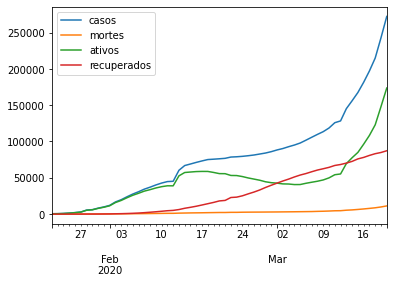

In [0]:
df.plot()

In [0]:
df2 = pd.concat([ taxa_recuperados, p_ativos], axis=1)
df2.columns = (['TaxaRecuperados', 'PercentualAtivos'])

Text(0.5, 0.98, 'ATIVOS VS RECUPERADOS')

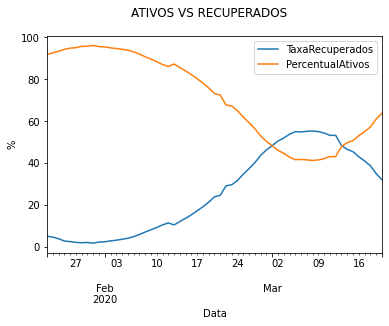

In [0]:
df2.plot()
plt.ylabel('%')
plt.xlabel('Data')
plt.suptitle('ATIVOS VS RECUPERADOS')